# Pair Programming Preprocesado

In [33]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

Usando el mismo dataset que usatéis ayer, los objetivos de los ejercicios de hoy son:

- Estandarizar las variables numéricas de vuestro set de datos
- Codificar las variables categóricas. Recordad que tendréis que tener en cuenta si vuestras variables tienen orden o no.
- Chequear si vuestros datos están balanceados. En caso de que no lo estén utilizad algunas de las herramientas aprendidas en la lección para balancearlos.
- Guardad el dataframe con los cambios que habéis aplicado para utilizarlo en la siguiente lección.

Happy coding 📊📈📉

In [34]:
df_menores = pd.read_csv("../regresion_logistica/ficheros/loan_limpio_menores.csv")
df_menores.head()

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,credit_history,property_area,loan_status,loan_plazo
0,Male,No,0,Graduate,No,5849,0.0,128.0,1.0,Urban,Y,largo
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,1.0,Rural,N,largo
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,1.0,Urban,Y,largo
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,1.0,Urban,Y,largo
4,Male,No,0,Graduate,No,6000,0.0,141.0,1.0,Urban,Y,largo


In [35]:
# Hacemos una copia del df sin estandarizar sobre el que vamos a trabajar hoy

df = df_menores.copy()

### Estanzarización de las variables numéricas:

In [36]:
scaler = StandardScaler()

In [37]:
numericas = df.select_dtypes(include=np.number)
numericas.head(2)

,dependents,applicantincome,coapplicantincome,loanamount,credit_history
0,0,5849,0.0,128.0,1.0
1,1,4583,1508.0,128.0,1.0


In [38]:
numericas = numericas.drop(["credit_history","dependents"], axis=1)

In [39]:
scaler.fit(numericas)

StandardScaler()

In [40]:
x_escaladas = scaler.transform(numericas)
numericas_estandar = pd.DataFrame(x_escaladas,columns = numericas.columns)
numericas_estandar.head()

,applicantincome,coapplicantincome,loanamount
0,0.311983,-0.613757,-0.181121
1,-0.079844,-0.025836,-0.181121
2,-0.569782,-0.613757,-1.021461
3,-0.698843,0.305552,-0.289552
4,0.358718,-0.613757,-0.004921


In [41]:
df.drop(["applicantincome", "coapplicantincome", "loanamount"], axis = 1, inplace= True)
df.head()

,gender,married,dependents,education,self_employed,credit_history,property_area,loan_status,loan_plazo
0,Male,No,0,Graduate,No,1.0,Urban,Y,largo
1,Male,Yes,1,Graduate,No,1.0,Rural,N,largo
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,largo
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,largo
4,Male,No,0,Graduate,No,1.0,Urban,Y,largo


In [42]:
df = pd.concat([df, numericas_estandar], axis=1)
df.head()

,gender,married,dependents,education,self_employed,credit_history,property_area,loan_status,loan_plazo,applicantincome,coapplicantincome,loanamount
0,Male,No,0,Graduate,No,1.0,Urban,Y,largo,0.311983,-0.613757,-0.181121
1,Male,Yes,1,Graduate,No,1.0,Rural,N,largo,-0.079844,-0.025836,-0.181121
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,largo,-0.569782,-0.613757,-1.021461
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,largo,-0.698843,0.305552,-0.289552
4,Male,No,0,Graduate,No,1.0,Urban,Y,largo,0.358718,-0.613757,-0.004921


### Codificación de las variables categóricas:

In [43]:
for col in df.select_dtypes(include = "O"):
    print(f"La columna {col} tiene los siguientes valores únicos:")
    print("------------") 
    print(df[col].value_counts())

La columna gender tiene los siguientes valores únicos:
------------
Male      413
Female     91
Name: gender, dtype: int64
La columna married tiene los siguientes valores únicos:
------------
Yes    326
No     178
Name: married, dtype: int64
La columna education tiene los siguientes valores únicos:
------------
Graduate        394
Not Graduate    110
Name: education, dtype: int64
La columna self_employed tiene los siguientes valores únicos:
------------
No     435
Yes     69
Name: self_employed, dtype: int64
La columna property_area tiene los siguientes valores únicos:
------------
Semiurban    193
Urban        165
Rural        146
Name: property_area, dtype: int64
La columna loan_status tiene los siguientes valores únicos:
------------
Y    344
N    160
Name: loan_status, dtype: int64
La columna loan_plazo tiene los siguientes valores únicos:
------------
largo    457
medio     40
corto      7
Name: loan_plazo, dtype: int64


No tienen orden: *gender*, *married*, *property_area*

Tienen orden: *education*, *loan_plazo*, *self_employed*, *dependents*

Para las columnas que tienen orden les vamos a dar los siguientes valores con el método *map*:

- education: Graduate -> 2, Not Graduate -> 1

In [44]:
mapa_edu = {"Graduate": 2, "Not Graduate": 1}

In [45]:
df["education_encoding"] = df["education"].map(mapa_edu)

- loan_pazo: largo -> 3, medio -> 2, corto -> 1

In [46]:
mapa_plazo = {"medio": 2, "corto": 1, "largo": 3}

In [47]:
df["plazo_encoding"] = df["loan_plazo"].map(mapa_plazo)

- self_employed: Yes -> 1, No -> 2

In [48]:
mapa_employed = {"Yes": 1, "No":2}

In [49]:
df["self_emp_encoding"] = df["self_employed"].map(mapa_employed)

- dependents: 0 -> 3, 1 -> 2, 2 -> 2, 3-> 1

In [50]:
mapa_depen = {0 : 3, 1: 2, 2: 2, 3:1}

In [51]:
df["dependents_encod"] = df["dependents"].map(mapa_depen)

Para las columnas que no tienen orden optamos por el método *get_dummies*:

In [52]:
lista_columnas = ["gender", "married", "property_area"]

df_encoded = pd.DataFrame()

for columna in lista_columnas:
    df_dummies = pd.get_dummies(df[columna], prefix_sep = "_", prefix = columna, dtype = int)

    df_encoded = pd.concat([df_encoded, df_dummies], axis = 1)

In [53]:
df_final = pd.concat([df,df_encoded], axis=1)
df_final.head()

,gender,married,dependents,education,self_employed,credit_history,property_area,loan_status,loan_plazo,applicantincome,...,plazo_encoding,self_emp_encoding,dependents_encod,gender_Female,gender_Male,married_No,married_Yes,property_area_Rural,property_area_Semiurban,property_area_Urban
0,Male,No,0,Graduate,No,1.0,Urban,Y,largo,0.311983,...,3,2,3,0,1,1,0,0,0,1
1,Male,Yes,1,Graduate,No,1.0,Rural,N,largo,-0.079844,...,3,2,2,0,1,0,1,1,0,0
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,largo,-0.569782,...,3,1,3,0,1,0,1,0,0,1
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,largo,-0.698843,...,3,2,3,0,1,0,1,0,0,1
4,Male,No,0,Graduate,No,1.0,Urban,Y,largo,0.358718,...,3,2,3,0,1,1,0,0,0,1


In [54]:
# borramos las columnas que ya rtienen encoding

df_final.drop(["gender", "married", "property_area", "education", "loan_plazo", "self_employed", "dependents"], axis=1, inplace = True)

In [55]:
df_final.head()

,credit_history,loan_status,applicantincome,coapplicantincome,loanamount,education_encoding,plazo_encoding,self_emp_encoding,dependents_encod,gender_Female,gender_Male,married_No,married_Yes,property_area_Rural,property_area_Semiurban,property_area_Urban
0,1.0,Y,0.311983,-0.613757,-0.181121,2,3,2,3,0,1,1,0,0,0,1
1,1.0,N,-0.079844,-0.025836,-0.181121,2,3,2,2,0,1,0,1,1,0,0
2,1.0,Y,-0.569782,-0.613757,-1.021461,2,3,1,3,0,1,0,1,0,0,1
3,1.0,Y,-0.698843,0.305552,-0.289552,1,3,2,3,0,1,0,1,0,0,1
4,1.0,Y,0.358718,-0.613757,-0.004921,2,3,2,3,0,1,1,0,0,0,1


Codificamos la variable respuesta, 'loan_status con map como 0->N y 1->Y

In [56]:
mapa_loan = {'N':0,'Y':1}

In [57]:
df_final["loan_status"] = df_final["loan_status"].map(mapa_loan)

In [58]:
df_final.head(2)

,credit_history,loan_status,applicantincome,coapplicantincome,loanamount,education_encoding,plazo_encoding,self_emp_encoding,dependents_encod,gender_Female,gender_Male,married_No,married_Yes,property_area_Rural,property_area_Semiurban,property_area_Urban
0,1.0,1,0.311983,-0.613757,-0.181121,2,3,2,3,0,1,1,0,0,0,1
1,1.0,0,-0.079844,-0.025836,-0.181121,2,3,2,2,0,1,0,1,1,0,0


Nos damos cuenta de que credit_history es de tipo float y lo cambiamos a integer

In [59]:
df_final['credit_history']=df_final['credit_history'].astype(int)

In [60]:
df_final.dtypes

credit_history               int64
loan_status                  int64
applicantincome            float64
coapplicantincome          float64
loanamount                 float64
education_encoding           int64
plazo_encoding               int64
self_emp_encoding            int64
dependents_encod             int64
gender_Female                int64
gender_Male                  int64
married_No                   int64
married_Yes                  int64
property_area_Rural          int64
property_area_Semiurban      int64
property_area_Urban          int64
dtype: object

In [61]:
df_final.to_csv("../regresion_logistica/ficheros/loan_ecoding.csv", index = False)

### Comprobamos si nuestros datos están balanceados:

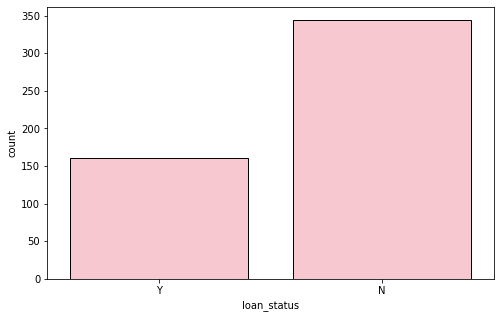

In [62]:
plt.figure(figsize=(8,5)) 
fig1 = sns.countplot(data = df_final, x = "loan_status",  color = "pink",  edgecolor='black')
fig1.set(xticklabels=["Y", "N"])
plt.show()

Nuestros datos sí que están desequilibrados, ya que hay más créditos concedidos que denegados en una proprción del 70/30.

In [63]:
# desbalanceamos con SMOTE

y = df_final["loan_status"]
x = df_final.drop("loan_status", axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7)

In [64]:
os_us = SMOTETomek()
x_train_res, y_train_res = os_us.fit_resample(x_train, y_train)

In [65]:
print (f"Distribución antes del ajuste \n {y_train.value_counts()}" )
print("..............................................................")
print (f"Distribución después del ajuste \n {y_train_res.value_counts()}")

Distribución antes del ajuste 
 1    240
0    112
Name: loan_status, dtype: int64
..............................................................
Distribución después del ajuste 
 1    225
0    225
Name: loan_status, dtype: int64


Downsampling con Pandas

In [66]:
# clase minoritaria
num_minoritarios = df_final["loan_status"].value_counts()[1]
num_minoritarios

344

In [69]:
#dataframe con las filas donde la variable respuesta es 0 que es la minoritaria
minoritarios = df_final[df_final["loan_status"] ==0]
minoritarios.head(2)

,credit_history,loan_status,applicantincome,coapplicantincome,loanamount,education_encoding,plazo_encoding,self_emp_encoding,dependents_encod,gender_Female,gender_Male,married_No,married_Yes,property_area_Rural,property_area_Semiurban,property_area_Urban
1,1,0,-0.079844,-0.025836,-0.181121,2,3,2,2,0,1,0,1,1,0,0
7,0,0,-0.558640,0.362473,0.225494,2,3,2,1,0,1,0,1,0,1,0


In [70]:
# Conseguimos una muestra de la catg mayoritaria que sea del mismo tamaño que la minoritaria 
mayoritarios = df_final[df_final["loan_status"] == 1].sample(num_minoritarios, random_state = 42)
mayoritarios.head(2)

,credit_history,loan_status,applicantincome,coapplicantincome,loanamount,education_encoding,plazo_encoding,self_emp_encoding,dependents_encod,gender_Female,gender_Male,married_No,married_Yes,property_area_Rural,property_area_Semiurban,property_area_Urban
282,1,1,-0.516238,-0.613757,-0.913030,1,3,2,1,0,1,0,1,0,1,0
231,1,1,-0.647157,0.104380,-0.357322,2,3,2,2,0,1,0,1,0,1,0


In [71]:
#Unimos los dataframes
balanceado = pd.concat([minoritarios,mayoritarios],axis = 0)
balanceado.head(2)

,credit_history,loan_status,applicantincome,coapplicantincome,loanamount,education_encoding,plazo_encoding,self_emp_encoding,dependents_encod,gender_Female,gender_Male,married_No,married_Yes,property_area_Rural,property_area_Semiurban,property_area_Urban
1,1,0,-0.079844,-0.025836,-0.181121,2,3,2,2,0,1,0,1,1,0,0
7,0,0,-0.558640,0.362473,0.225494,2,3,2,1,0,1,0,1,0,1,0


In [72]:
balanceado['loan_status'].value_counts() # comprobamos que ha balanceado

1    344
0    160
Name: loan_status, dtype: int64

Upsampling con imblearn

In [73]:
X = df_final.drop("loan_status", axis = 1)
y = df_final["loan_status"]

In [74]:
upp = RandomOverSampler()

In [75]:
X_upp, y_upp = upp.fit_resample(X,y)

In [76]:
y_upp.value_counts()

1    344
0    344
Name: loan_status, dtype: int64

In [77]:
balanceado_final = pd.concat([X_upp, y_upp], axis = 1)
balanceado_final.head()

,credit_history,applicantincome,coapplicantincome,loanamount,education_encoding,plazo_encoding,self_emp_encoding,dependents_encod,gender_Female,gender_Male,married_No,married_Yes,property_area_Rural,property_area_Semiurban,property_area_Urban,loan_status
0,1,0.311983,-0.613757,-0.181121,2,3,2,3,0,1,1,0,0,0,1,1
1,1,-0.079844,-0.025836,-0.181121,2,3,2,2,0,1,0,1,1,0,0,0
2,1,-0.569782,-0.613757,-1.021461,2,3,1,3,0,1,0,1,0,0,1,1
3,1,-0.698843,0.305552,-0.289552,1,3,2,3,0,1,0,1,0,0,1,1
4,1,0.358718,-0.613757,-0.004921,2,3,2,3,0,1,1,0,0,0,1,1


In [78]:
#guardamos el archivo limpio, codificado y con los datos balanceados:
balanceado_final.to_csv('loan_balanceado.csv')